In [92]:
import numpy as np
import sampler
import driver
import kepler
import system
import results
import multiprocessing as mp
import matplotlib.pyplot as plt
from numpy import loadtxt
import pandas as pd
import pickle

In [80]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=15)
plt.rc('axes', linewidth=1)

In [109]:
params_list = pd.read_csv('/Users/Helios/Desktop/jupyter_notebooks/orbitize_radvel_stanford/test_params.csv',header=None)
params_list.values[0].shape

(11,)

In [112]:
def p2sma(P,m0,m1):
    return ((P/365.25)**2*(m0 + m1))**(1/3)

print(p2sma(5723.547291776889,2.732812475266175, 0.29638151528933077))

9.060643914404968


In [111]:
our_params = params_list.values[0]
their_order = [2,3,6,4,5,7,8,9,10,1,0]
mylist = [our_params[i] for i in their_order]
print(mylist)

[5723.547291776888, 0.18184940559548912, 0.7020217697083029, 4.878872959403289, 1.0493114447179797, 500.0, 60.80464310647288, 66.41514836846184, 16.497965667677036, 0.2963815152893308, 2.732812475266175]


In [114]:
mylist[0] = p2sma(mylist[0],mylist[-1], mylist[-2])

In [115]:
mylist

[9.060643914404968,
 0.18184940559548912,
 0.7020217697083029,
 4.878872959403289,
 1.0493114447179797,
 500.0,
 60.80464310647288,
 66.41514836846184,
 16.497965667677036,
 0.2963815152893308,
 2.732812475266175]

In [62]:
params_list.loc[0]

0        2.732812
1        0.296382
2     5723.547292
3        0.181849
4        4.878873
5        1.049311
6        0.702022
7      500.000000
8       60.804643
9       66.415148
10      16.497966
Name: 0, dtype: float64

In [30]:
# MCMC parameters
num_temps = 20
num_walkers = 50
num_threads = mp.cpu_count() # or a different number if you prefer

myDriver = driver.Driver('/Users/Helios/orbitize/tests/testdata0.csv', # path to data file
                                  sampler_str='MCMC', # name of algorithm for orbit-fitting
                                  num_secondary_bodies=1, # number of secondary bodies in system
                                  system_mass=2.7, # total system mass [M_sun]
                                  plx=61, # total parallax of system [mas]
                                  mass_err=0.05, # mass error [M_sun]
                                  plx_err=1.0, # parallax error [mas]
                                  system_kwargs = {'fit_secondary_mass':True,
                                  'tau_ref_epoch':0, 'gamma_bounds':(-100, 200), 'jitter_bounds':(1e-3, 50)},
                                  mcmc_kwargs={'num_temps': num_temps, 'num_walkers': num_walkers,
                                  'num_threads': num_threads})

total_orbits = 100000 # number of steps x number of walkers (at lowest temperature)
burn_steps = 1000 # steps to burn in per walker
thin = 10# only save every 2nd step

In [119]:
num_threads

2

In [69]:
myDriver.sampler.run_sampler(total_orbits, burn_steps=0, thin=thin)

Burn in complete


/Users/Helios/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/Helios/orbitize/orbitize/priors.py:217: RuntimeWarning: invalid value encountered in log
  lnprob = -np.log((element_array*normalizer))
/Users/Helios/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array)/normalization)
/Users/Helios/orbitize/orbitize/priors.py:326: RuntimeWarning: invalid value encountered in log
  lnprob = np.log(np.sin(element_array)/normalization)


2000/2000 steps completed
Run complete


In [10]:
params_list = ['sma1','ecc1','inc1','aop1','pan1','tau1','plx','gamma',
              'sigma','m0','mtot']

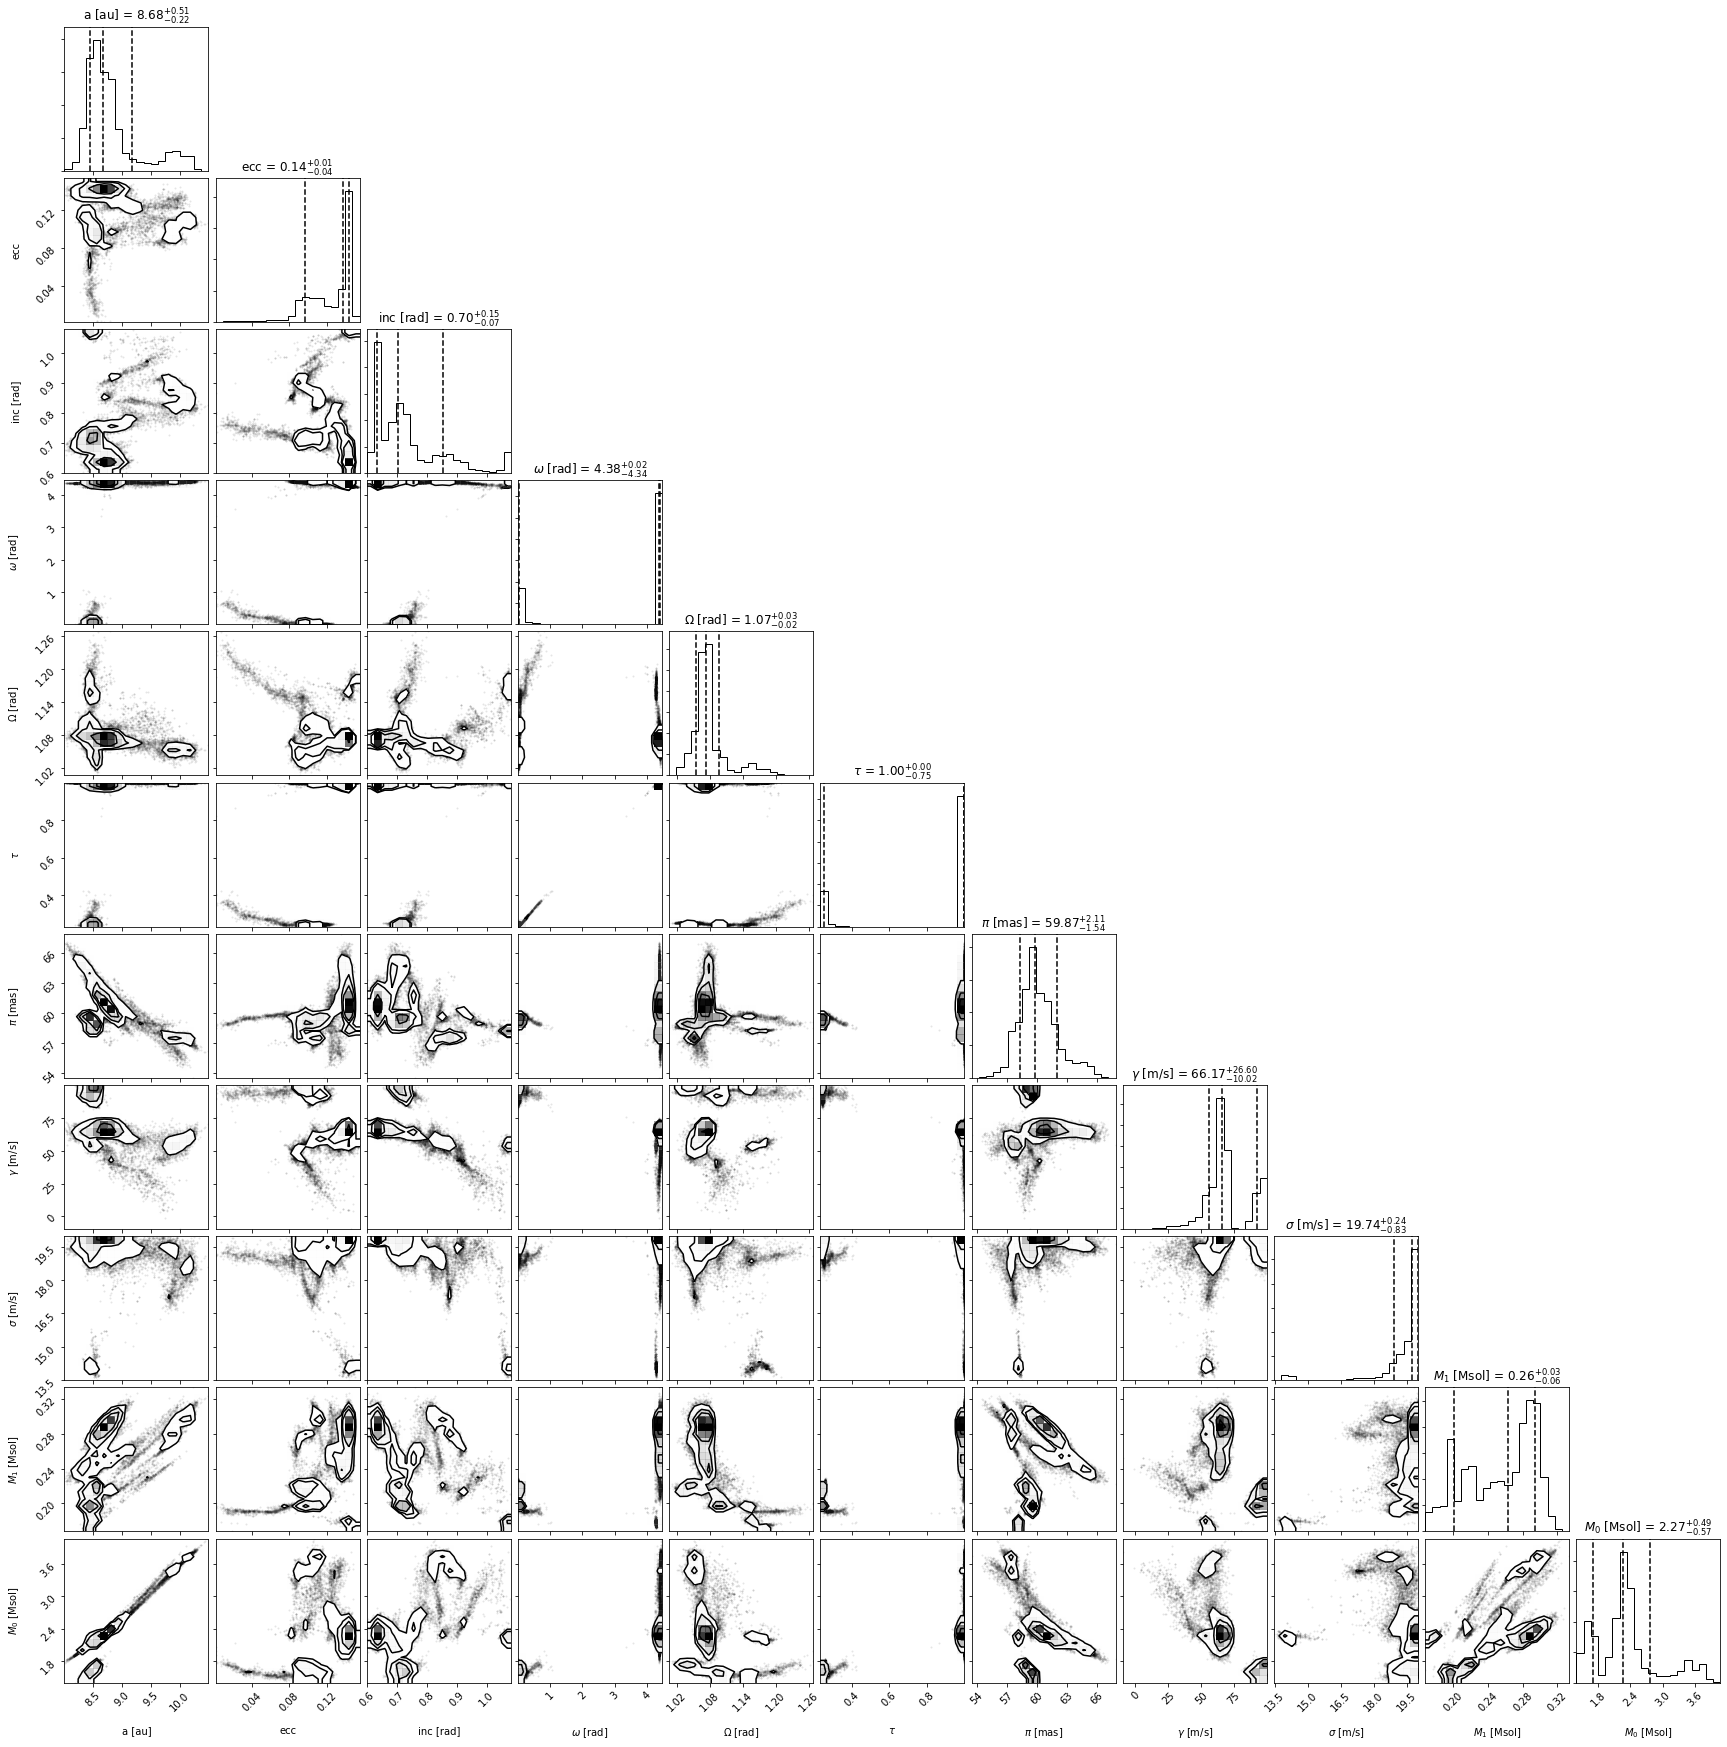

In [70]:
corner_plot_fig = myDriver.sampler.results.plot_corner(show_titles=True,
                                     quantiles=[0.16,0.5,0.84]) # Creates a corner plot and returns Figure object
corner_plot_fig.savefig('/Users/Helios/Desktop/jupyter_notebooks/orbitize_radvel_stanford/testdata0_cornerplot3.pdf') # This is matplotlib.figure.Figure.savefig()

In [120]:
myDriver.sampler.chain.shape

(15, 50, 200, 11)

In [72]:
print(myDriver.sampler.chain)

[[[[8.63796535e+00 1.27678225e-01 7.40262027e-01 ... 1.92472565e+01
    2.44004876e-01 2.22108201e+00]
   [8.43740278e+00 1.37201228e-01 7.55614709e-01 ... 1.96228211e+01
    2.28891177e-01 2.07770198e+00]
   [8.56920888e+00 1.36285507e-01 7.55164810e-01 ... 1.96409519e+01
    2.36219292e-01 2.18957814e+00]
   ...
   [8.76836614e+00 1.43528830e-01 6.22918660e-01 ... 1.99858855e+01
    2.97790868e-01 2.32795606e+00]
   [8.63602649e+00 1.44278886e-01 6.29729126e-01 ... 1.99994548e+01
    2.84657675e-01 2.23348766e+00]
   [8.68078601e+00 1.43836157e-01 6.30292660e-01 ... 1.99978403e+01
    2.87715228e-01 2.26909563e+00]]

  [[8.84479064e+00 1.31332805e-01 7.63635540e-01 ... 1.97960409e+01
    2.50936182e-01 2.41884654e+00]
   [8.97341240e+00 1.33583511e-01 7.69673438e-01 ... 1.98693055e+01
    2.56197811e-01 2.52655706e+00]
   [8.95941722e+00 1.39826560e-01 7.79012328e-01 ... 1.99447563e+01
    2.51220926e-01 2.52729797e+00]
   ...
   [8.77194443e+00 1.41726840e-01 6.32823697e-01 ... 1.99

In [94]:
pkl_file = open('../tests/testdata0_mcmcchains_run3.txt','wb')
pickle.dump(myDriver.sampler.chain,pkl_file)

In [95]:
objects = []
with (open("../tests/testdata0_mcmcchains_run3.txt", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [154]:
chains = myDriver.sampler.chain
print(np.median(chains[0,:,100:,0]))

8.735639709315587


In [160]:
orbitize_params = []
for p in range(num_params):
    median_parameter = np.median(chains[0,:,100:,p])
    orbitize_params.append(median_parameter)

In [161]:
print(orbitize_params)

[8.735639709315587, 0.14281082497802844, 0.6320485934297972, 4.3825672914607, 1.0719219277480345, 0.9999791334139635, 60.64702842266169, 66.94133596496121, 19.988555335150416, 0.2910919660048098, 2.3086164235009834]


In [162]:
pkl_file = open('/Users/Helios/Desktop/jupyter_notebooks/orbitize_radvel_stanford/orbitize_outputparams0.txt','wb')
pickle.dump(orbitize_params,pkl_file)

In [101]:
param_names = ['sma','ecc','inc','$\omega$','$\Omega$','$T_0$','$\pi$','$\gamma$','$\sigma$','M0','M1']

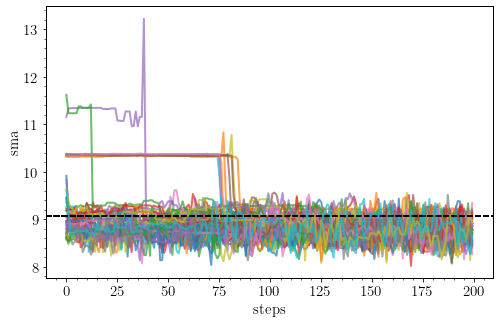

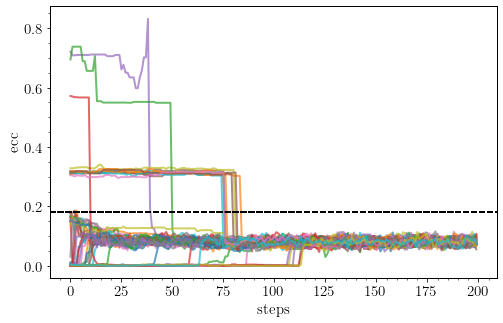

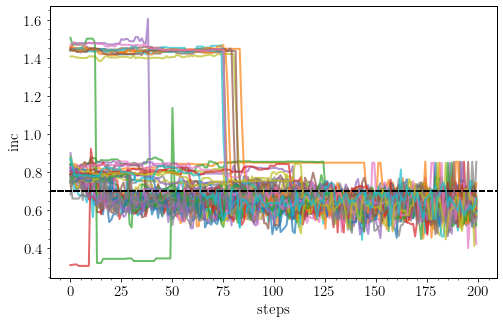

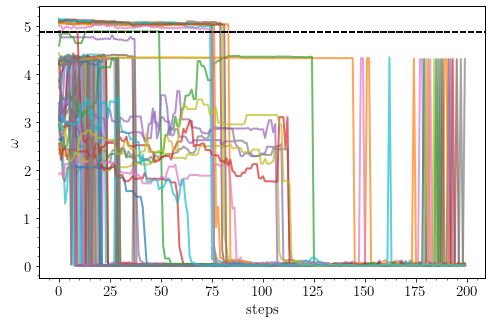

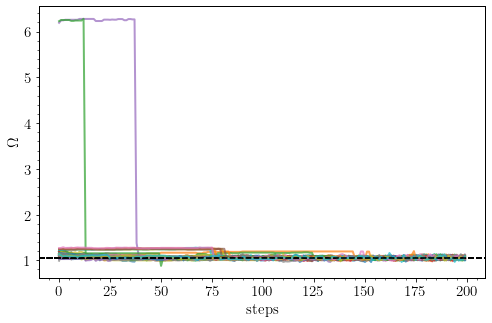

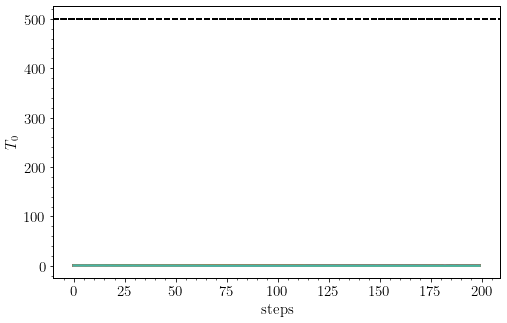

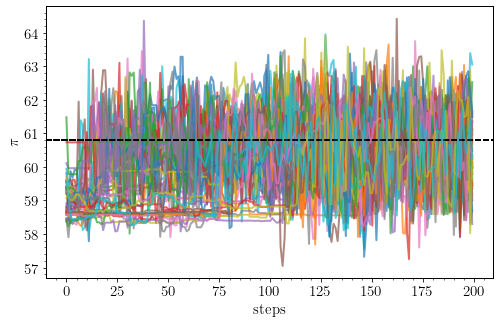

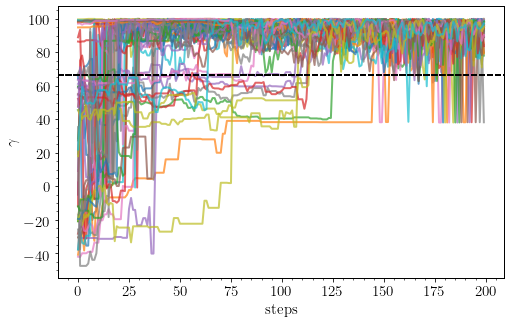

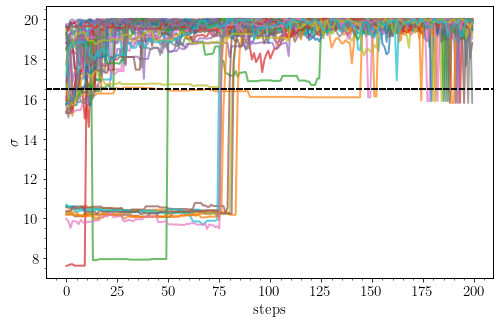

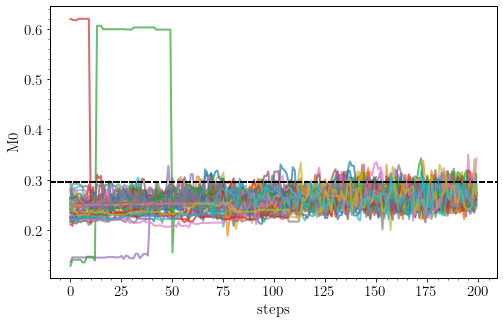

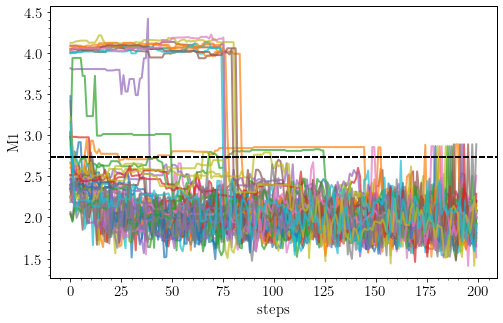

In [118]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('/Users/Helios/Desktop/jupyter_notebooks/orbitize_radvel_stanford/walkers_testdata0_mcmc5_pdf.pdf') as pdf:
    shape = np.shape(myDriver.sampler.chain)
    num_steps = shape[2]
    num_params = shape[3]
    num_walkers = shape[1]
    for p in range(num_params):
        pname = param_names[p]
        fig = plt.figure(figsize = (8,5))
        for i in range(num_walkers):
            plt.plot(range(num_steps),myDriver.sampler.chain[5,i,:,p],alpha=0.7,linewidth=2) #makes trend plot trend
            plt.axhline(mylist[p],ls='--',c='k')
        plt.ylabel(pname)
        plt.xlabel('steps')
        plt.minorticks_on()
        pdf.savefig()
        plt.show()
        plt.close()